## What is Seaborn?
- A Python package for generating statistical graphics.
- It offers preset styles and color palettes, enabling the creation of complex, visually appealing charts with minimal code.
- Designed to make visualization a core part of data exploration and analysis.
- Its dataset-oriented plotting functions work seamlessly with Pandas DataFrames and NumPy arrays, performing semantic mapping and statistical aggregation to produce insightful plots.
- Built on top of Matplotlib, Seaborn complements rather than replaces it, utilizing Matplotlib for rendering behind the scenes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Why as `seaborn`?

- Michael Waskom, the library’s creator, named it after the *Seaborn McDougle* – statistical consulting firm, which was part of the company where he was working when he started developing the library.
- The word *seaborn* could suggest something *born of the sea*, metaphorically linking it to waves, patterns, and fluid data visualization techniques.


### Why as `sns`?

- It is a joke reference *Samuel Norman "Sam" Seaborn*, a fictional character portrayed by Rob Lowe on the television serial drama The West Wing.
- You can also think of it as *seaborn name space*.

## Seaborn can change appearance of Matplotlib figures

- While Matplotlib is highly customizable, it can be complex, as determining the right settings for an aesthetically pleasing plot can be challenging.  
- Seaborn simplifies this process by providing built-in themes and a high-level interface for adjusting the appearance of Matplotlib figures.  

### Setting the Default Seaborn Theme  

The recommended way to configure Seaborn's theme, scaling, and color palette is:

```python
sns.set_theme()
```

- If you simply call the `set_theme()`, you switch to seaborn defaults.
- We have 5 seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. The default theme is `darkgrid`.

This function updates Matplotlib's `rcParams` to apply Seaborn’s styling preferences.  
   - `rcParams` (runtime configuration parameters) are a set of global settings in Matplotlib that control the appearance of plots. 
   - These parameters define aspects such as figure size, colors, fonts, line styles, and more.  

Seaborn modifies `rcParams` to apply its own themes and styles, ensuring visually appealing plots with minimal effort.  


**Note:** `sns.set()` is *deprecated* and should no longer be used.

In [2]:
# You can view or modify Matplotlib's `rcParams` directly:
# print(plt.rcParams)

# You can change a specific `rcParam` (e.g., figure size)
plt.rcParams["figure.figsize"] = (6, 4.5)

## Scaling plot elements

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

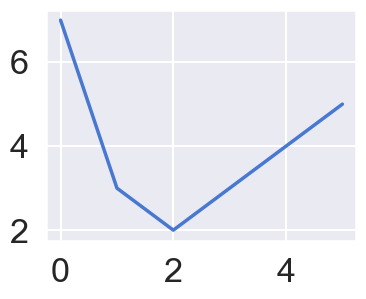

In [3]:
sns.set_theme(style="darkgrid", context="talk", palette="muted", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot([7, 3, 2, 3, 4, 5]);

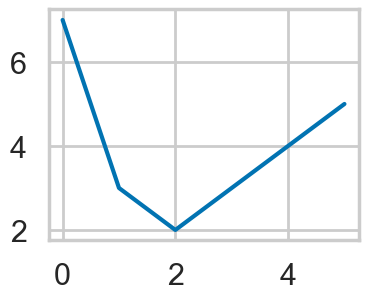

In [4]:
# Set style (options: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks') default: 'darkgrid'
sns.set_style("whitegrid")

# Set context (options: 'paper', 'notebook', 'talk', 'poster') default: 'notebook'
sns.set_context("poster")

# Set color theme (options: 'deep', 'muted', 'bright', 'colorblind') default: 'deep'
sns.set_palette("colorblind")  

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot([7, 3, 2, 3, 4, 5]);

In [5]:
def cosplot(n=10, flip=10):
    x = np.linspace(0, 10, 100)
    _, ax = plt.subplots(figsize=(4, 3))
    for i in range(1, n + 1):
        ax.plot(x, np.cos(x + i * .5) * (n + 2 - i) * flip)

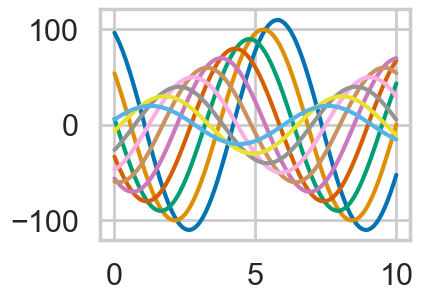

In [6]:
cosplot()

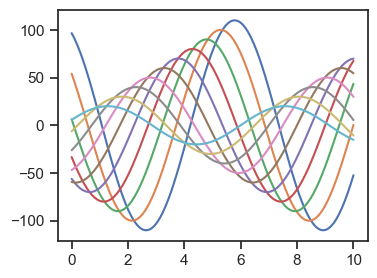

In [7]:
sns.set_theme(style="ticks")
cosplot()

## Removing axes spines

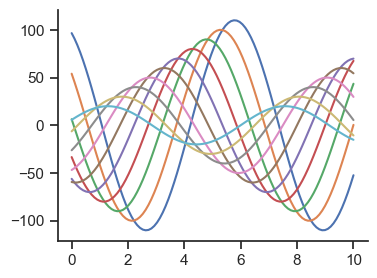

In [8]:
cosplot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling `despine()`.
 
When the ticks don’t cover the whole range of the axis, the `trim` parameter will limit the range of the surviving spines.

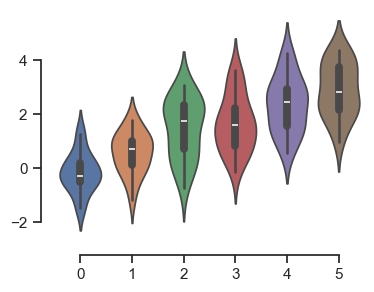

In [9]:
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2

_, ax = plt.subplots(figsize=(4, 3))
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

You can also control which spines are removed with additional arguments to `despine()`:

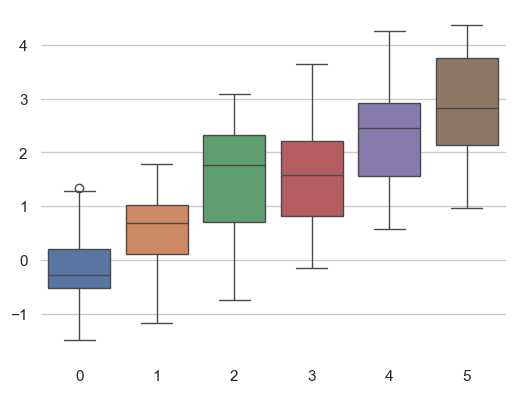

In [10]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True, bottom=True)

## Temporarily setting figure style

You can use the `axes_style()` in a with statement to temporarily set plot parameters. 

This also allows you to make figures with differently-styled axes:

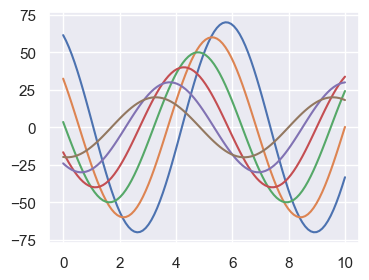

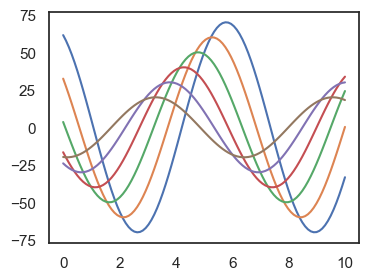

In [11]:
with sns.axes_style("darkgrid"):
    cosplot(6)

with sns.axes_style("white"):
    cosplot(6)

In [12]:
sns.set_style("white")

# Seaborn main plotting functions

### Figure-Level vs. Axes-Level Functions in Seaborn

#### 1. Figure-Level Functions: `relplot`, `displot`, `catplot`
- Create an **entire figure** with subplots automatically.
- Return a **FacetGrid** or similar object, not an `ax`.
- Support `col`, `row`, and `hue` for faceting.


#### 2. Axes-Level Functions: `scatterplot`, `lineplot`, etc.
- Work on a **specific Matplotlib Axes**.
- Require an explicit `ax` for embedding in figures.
- Return an `ax` object, modifiable with Matplotlib.

#### Relationship between Figure-Level Functions and Axes-Level Functions
`relplot` (relational)
- `scatterplot`
- `lineplot`

`displot` (distributions)
- `histplot`
- `kdeplot`
- `ecdfplot`
- `rugplot`

`catplot` (categorical)
- `stripplot`
- `swarmplot`
- `boxplot`
- `violinplot`
- `pointplot`
- `barplot`

#### Key Differences

| Feature            | Figure-Level (`sns.catplot()`, etc.) | Axes-Level (`sns.boxplot()`, etc.) |
|--------------------|----------------------------------|----------------------------------|
| Creates figure?    | ✅ Yes                           | ❌ No, needs `plt.subplots()` |
| Returns           | `FacetGrid`, `PairGrid`, etc.   | `Axes` object                 |
| Supports multiple subplots? | ✅ Yes (`col`, `row`, `hue`) | ❌ No, must use `plt.subplots()` |
| Places legend inside of `ax`? | ❌ No | ✅ Yes |


In [13]:
tips = sns.load_dataset("tips")
tips.sample(7)

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
101,15.38,3.00,Female,Yes,Fri,Dinner,2
28,21.70,4.30,Male,No,Sat,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
210,30.06,2.00,Male,Yes,Sat,Dinner,3
39,31.27,5.00,Male,No,Sat,Dinner,3


In [14]:
tips.describe().style.format("{:.1f}")

,total_bill,tip,size
count,244.0,244.0,244.0
mean,19.8,3.0,2.6
std,8.9,1.4,1.0
min,3.1,1.0,1.0
25%,13.3,2.0,2.0
50%,17.8,2.9,2.0
75%,24.1,3.6,3.0
max,50.8,10.0,6.0


In [15]:
tips.select_dtypes(include=['object', 'category']).describe()

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [16]:
tips[tips.select_dtypes('object').columns] = tips.select_dtypes('object').astype('category')
tips.select_dtypes('category').apply(lambda col: list(col.cat.categories))

sex              [Male, Female]
smoker                [Yes, No]
day       [Thur, Fri, Sat, Sun]
time            [Lunch, Dinner]
dtype: object

# Relational plots

## `scatterplot` and `relplot`

- The relationship between `x` and `y` can be shown for different subsets of the data using the `hue`, `size`, and `style` parameters.
- These parameters control what visual semantics are used to identify the different subsets.

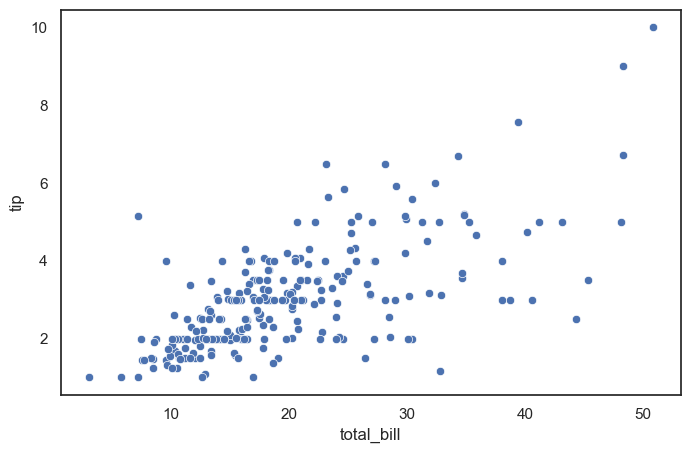

In [17]:
# plt.figure(figsize=(8, 5))

g, ax = plt.subplots()
g.set_size_inches(8, 5)

sns.scatterplot(data=tips, x="total_bill", y="tip");

Assigning a variable to hue will map its levels to the color of the points:

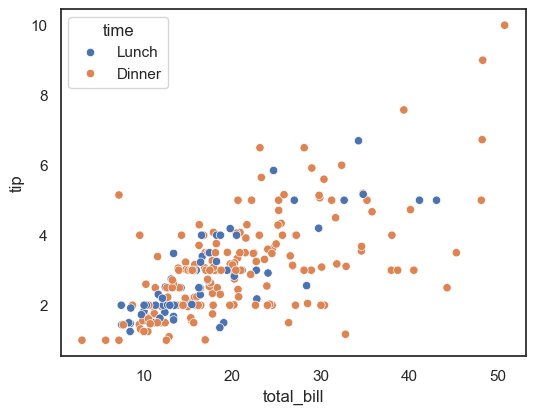

In [18]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time");

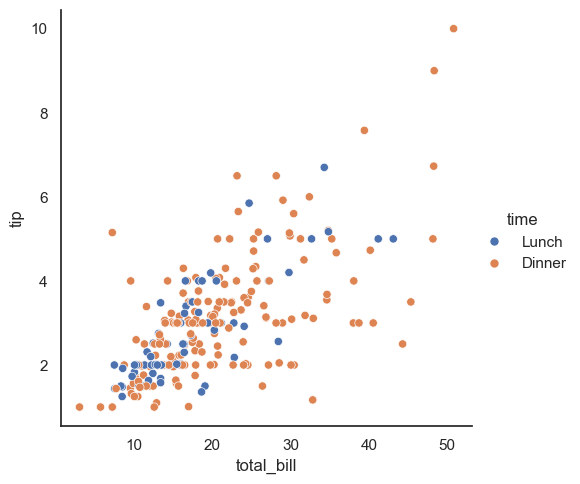

In [19]:
# sns.relplot(data=tips, x="total_bill", y="tip", hue="time")
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", kind="scatter");

Assigning the same variable to style will also vary the markers and create a more accessible plot:

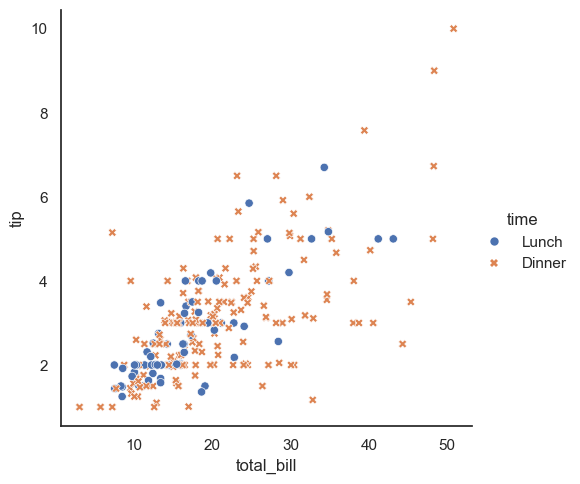

In [20]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", style="time");

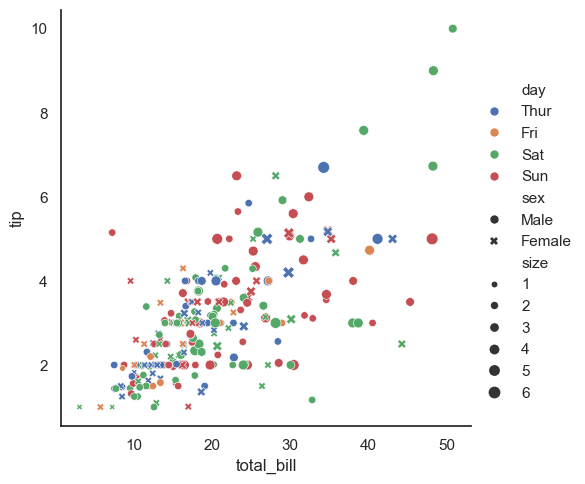

In [21]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="sex", size="size", palette="deep");

Assigning hue and style to different variables will vary colors and markers independently:

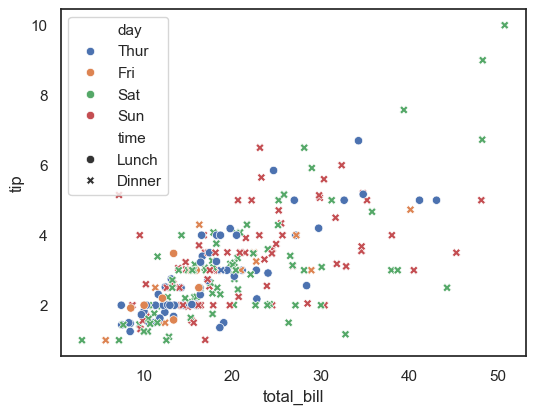

In [22]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time");

If the variable assigned to hue is numeric, the semantic mapping will be quantitative and use a different default palette:

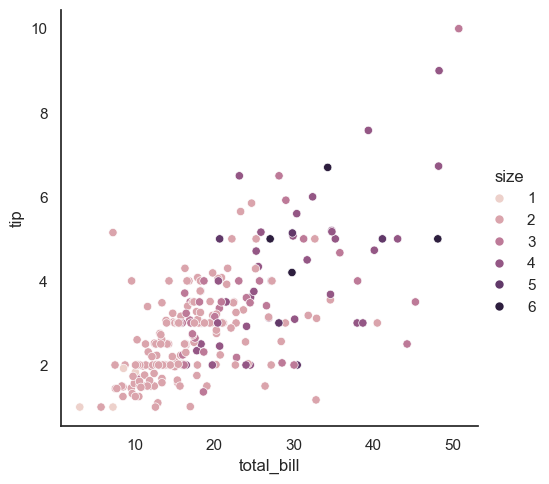

In [23]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="size");

Pass the name of a categorical palette or explicit colors (as a Python list of dictionary) to force categorical mapping of the hue variable:

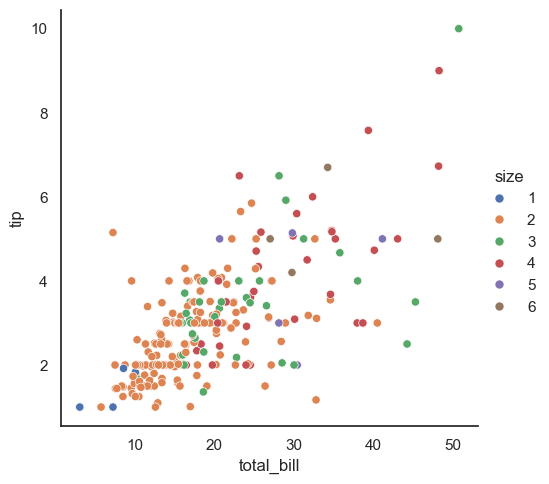

In [24]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="size", palette="deep");

If there are a large number of unique numeric values, the legend will show a representative, evenly-spaced set:

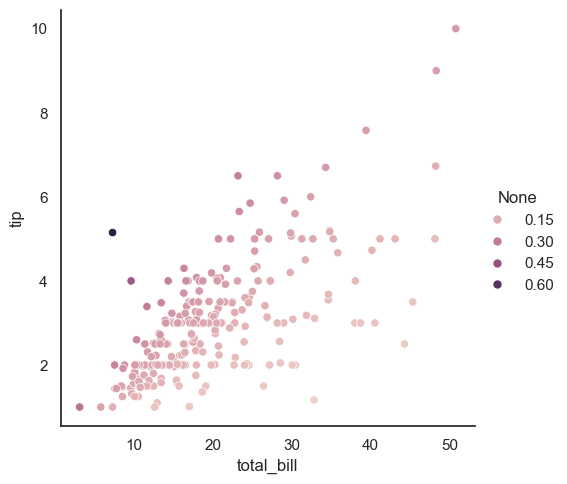

In [25]:
tip_rate = tips["tip"] / tips["total_bill"]
sns.relplot(data=tips, x="total_bill", y="tip", hue=tip_rate);

Control the specific markers used to map the style variable by passing a Python list or dictionary of marker codes:

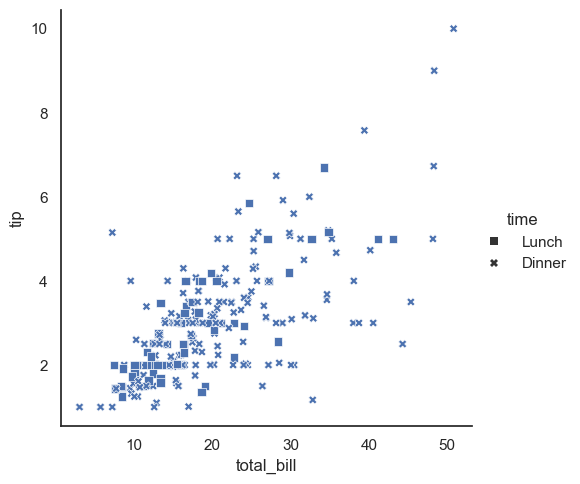

In [26]:
markers = {"Lunch": "s", "Dinner": "X"}
sns.relplot(data=tips, x="total_bill", y="tip", style="time", markers=markers);

`relplot()` allows grouping within additional categorical variables, and plotting them across multiple subplots.

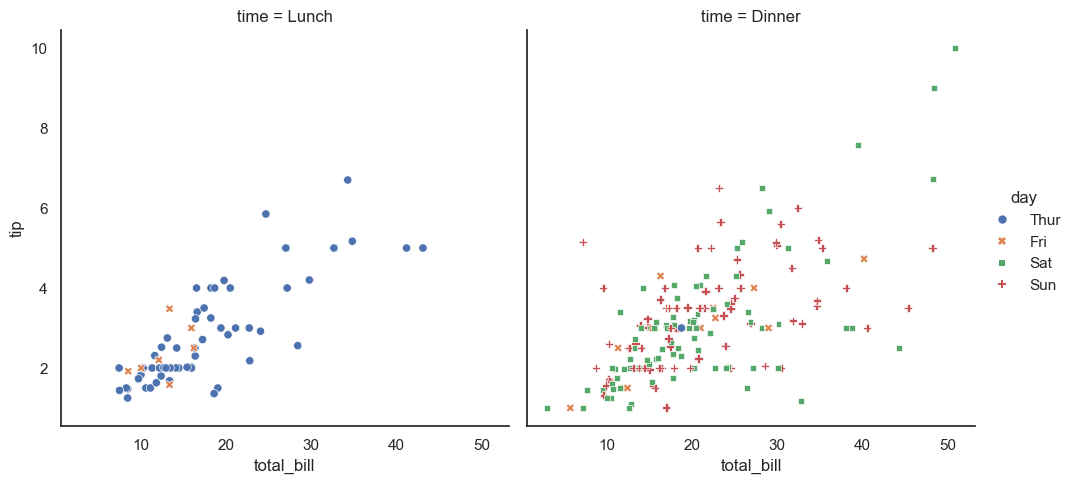

In [27]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
);

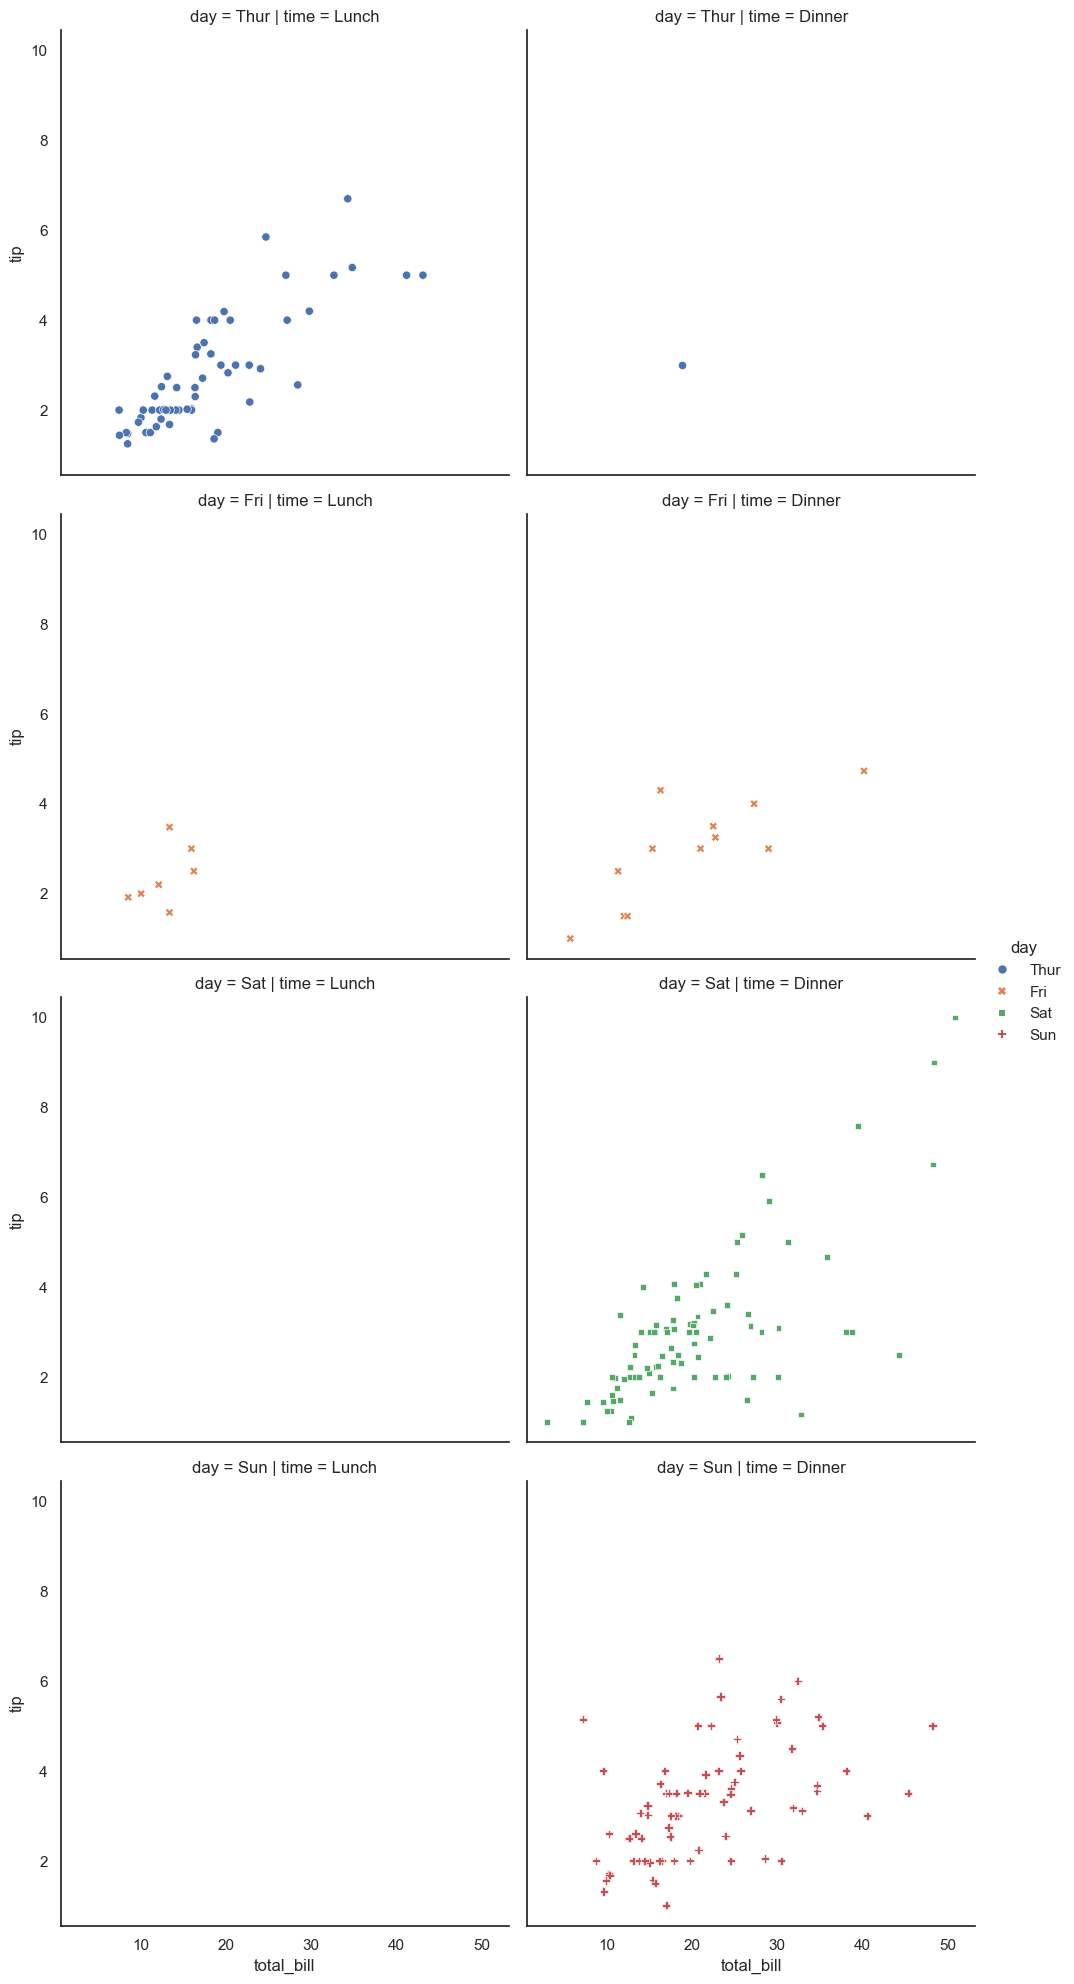

In [28]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    row="day",  col="time", hue="day", style="day",
    kind="scatter"
);

## `lineplot` and `relplot`

In [29]:
flights = sns.load_dataset("flights")
flights.sample(7)

,year,month,passengers
39,1952,Apr,181
80,1955,Sep,312
42,1952,Jul,230
135,1960,Apr,461
41,1952,Jun,218
14,1950,Mar,141
54,1953,Jul,264


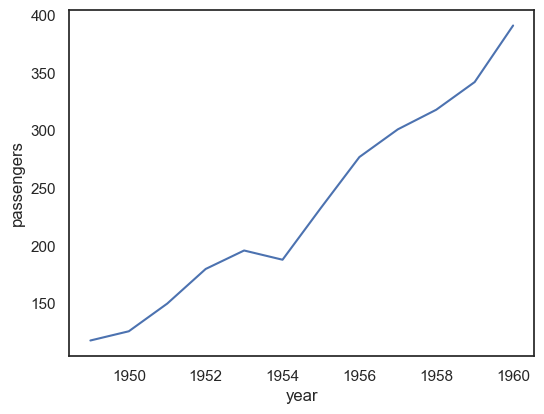

In [30]:
feb_flights = flights[flights["month"] == "Feb"]
sns.lineplot(data=feb_flights, x="year", y="passengers");

Let's pivot the dataframe to a wide-form representation:

In [31]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


To plot a single vector, pass it to data. If the vector is a `pandas.Series`, it will be plotted against its index:

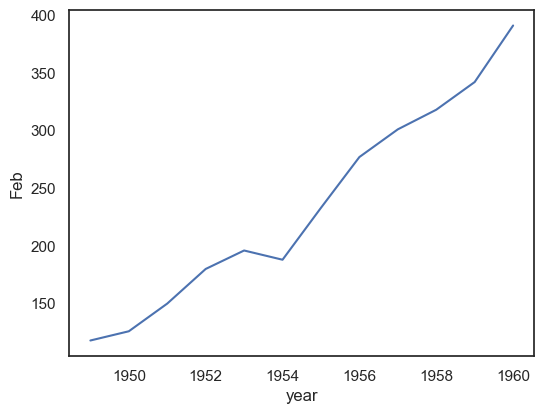

In [32]:
sns.lineplot(data=flights_wide["Feb"]);

Passing the entire wide-form dataset to data plots a separate line for each column:

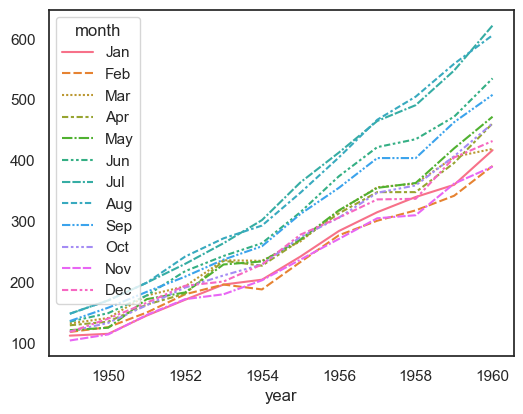

In [33]:
sns.lineplot(data=flights_wide);

Assign a grouping semantic (`hue`, `size`, or `style`) to plot separate lines:

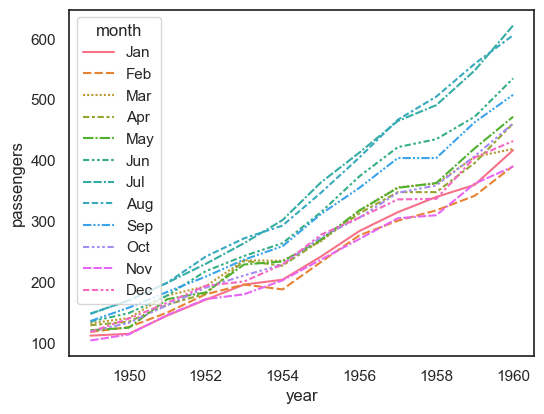

In [34]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month");

#### Placing the Legend Outside the Axes

In many cases, you may want to position the legend outside the plot area to avoid overlap with the data. This can be achieved in two ways:

1. **Using Matplotlib**  
   The `bbox_to_anchor` parameter in `plt.legend()` allows you to move the legend outside the axes. It specifies a bounding box where the legend is positioned, with `loc` determining which part of the legend box aligns with the specified coordinates. 
   
   For example, setting `bbox_to_anchor=(1.05, 1)` places the upper-left corner of the legend at `(1.05, 1)`, slightly outside the plot area. 
   
   Additionally, `frameon=False` can be used to remove the border around the legend.

2. **Using Seaborn**  
   When using figure-level functions like `relplot`, `catplot`, or `lmplot`, seaborn automatically places the legend outside the axes. This makes it convenient for handling legends without manual adjustments.


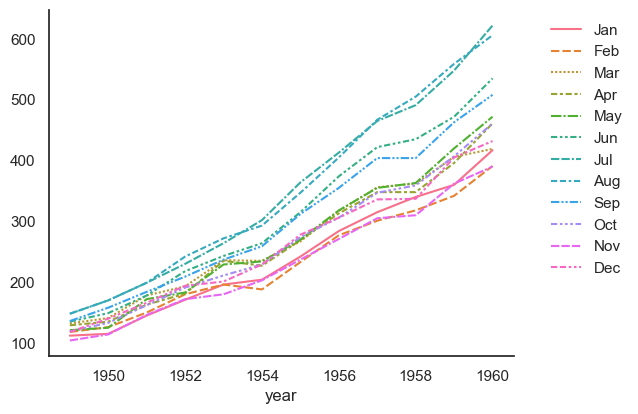

In [35]:
sns.lineplot(data=flights_wide);

sns.despine()
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', frameon=False);

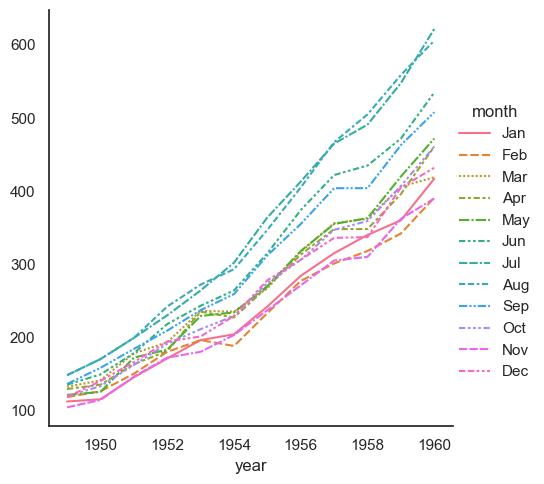

In [36]:
sns.relplot(data=flights_wide, kind="line");

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

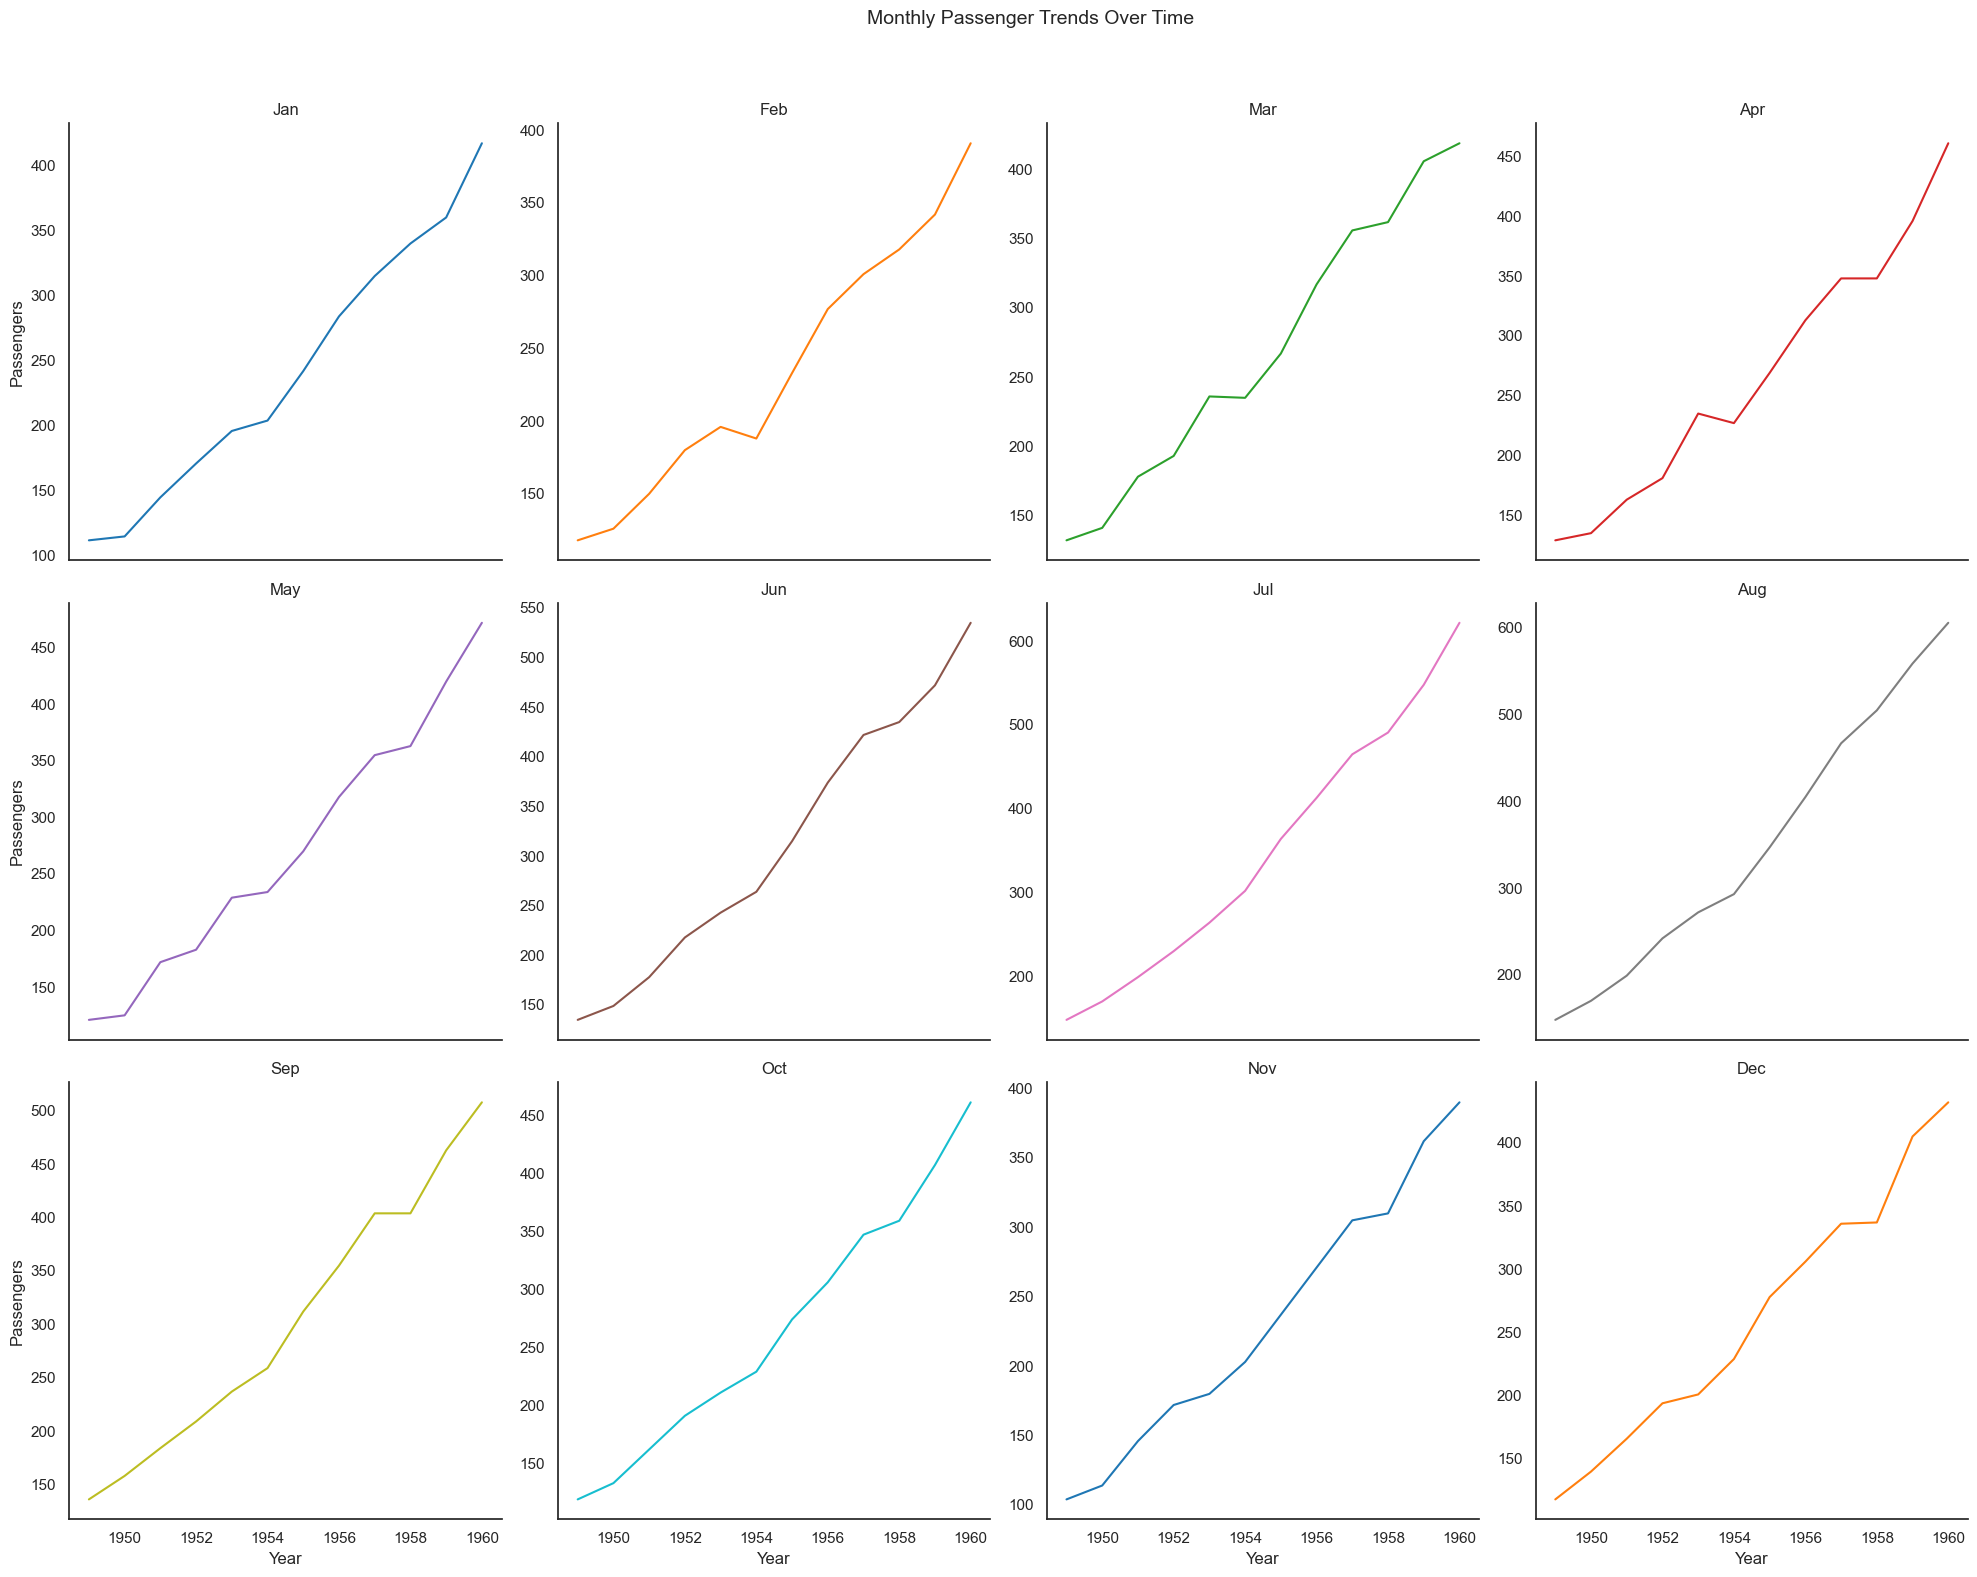

In [37]:
g = sns.relplot(
    data=flights, 
    kind="line", 
    x="year", 
    y="passengers", 
    col="month", 
    hue="month", 
    col_wrap=4, 
    palette="tab10", 
    facet_kws={'sharey': False}  # Allows different y-scales per month if needed
)

g._legend.remove()
g.set_titles("{col_name}")  # Shows only month names as titles
g.set_axis_labels("Year", "Passengers")  # Adds clear axis labels
g.figure.suptitle("Monthly Passenger Trends Over Time", fontsize=14, y=1.05);  # Adds a main title

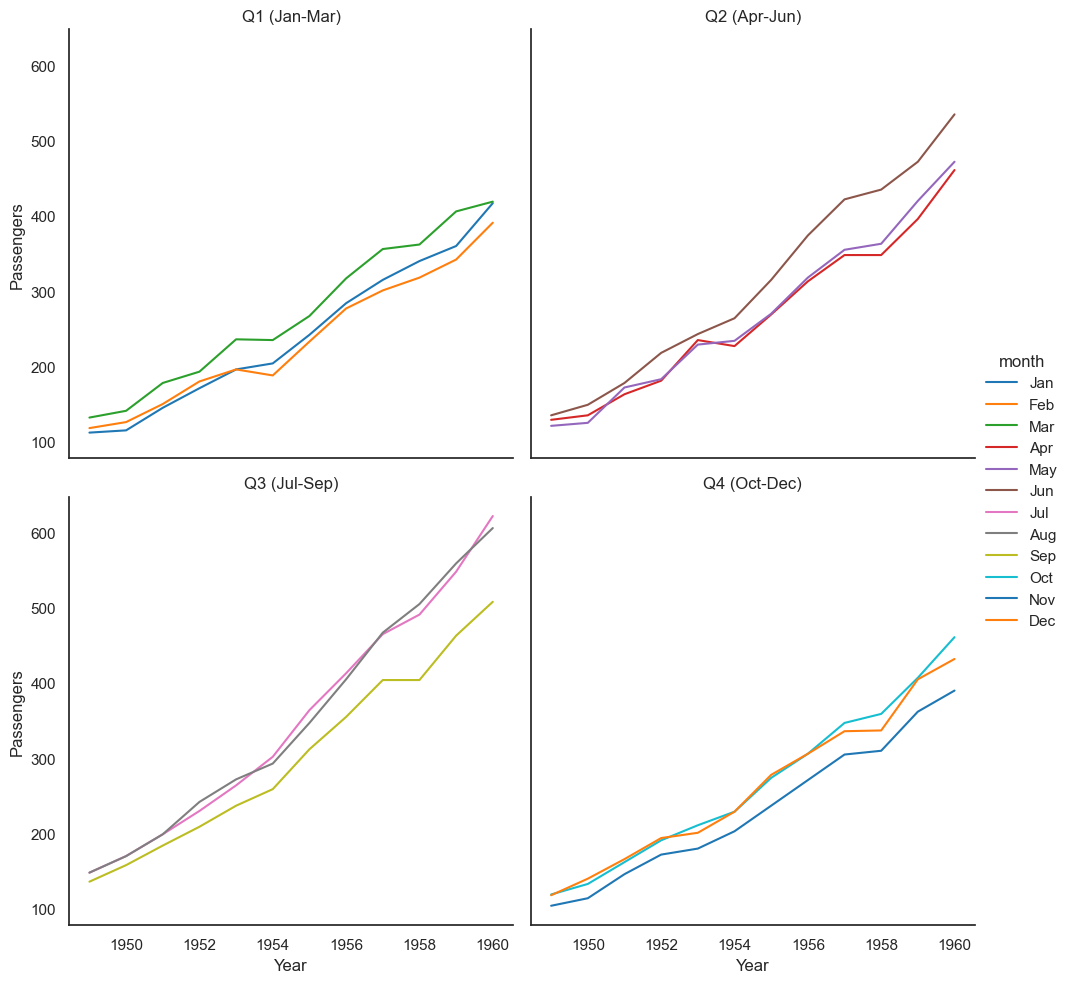

In [38]:
month_groups = {
    'Jan': 'Q1 (Jan-Mar)', 'Feb': 'Q1 (Jan-Mar)', 'Mar': 'Q1 (Jan-Mar)',
    'Apr': 'Q2 (Apr-Jun)', 'May': 'Q2 (Apr-Jun)', 'Jun': 'Q2 (Apr-Jun)',
    'Jul': 'Q3 (Jul-Sep)', 'Aug': 'Q3 (Jul-Sep)', 'Sep': 'Q3 (Jul-Sep)',
    'Oct': 'Q4 (Oct-Dec)', 'Nov': 'Q4 (Oct-Dec)', 'Dec': 'Q4 (Oct-Dec)'
}
flights['month_group'] = flights['month'].map(month_groups)

g = sns.relplot(
    data=flights, 
    kind="line", 
    x="year", 
    y="passengers", 
    hue="month", 
    col="month_group", 
    col_wrap=2,
    palette="tab10"
)

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Passengers");  

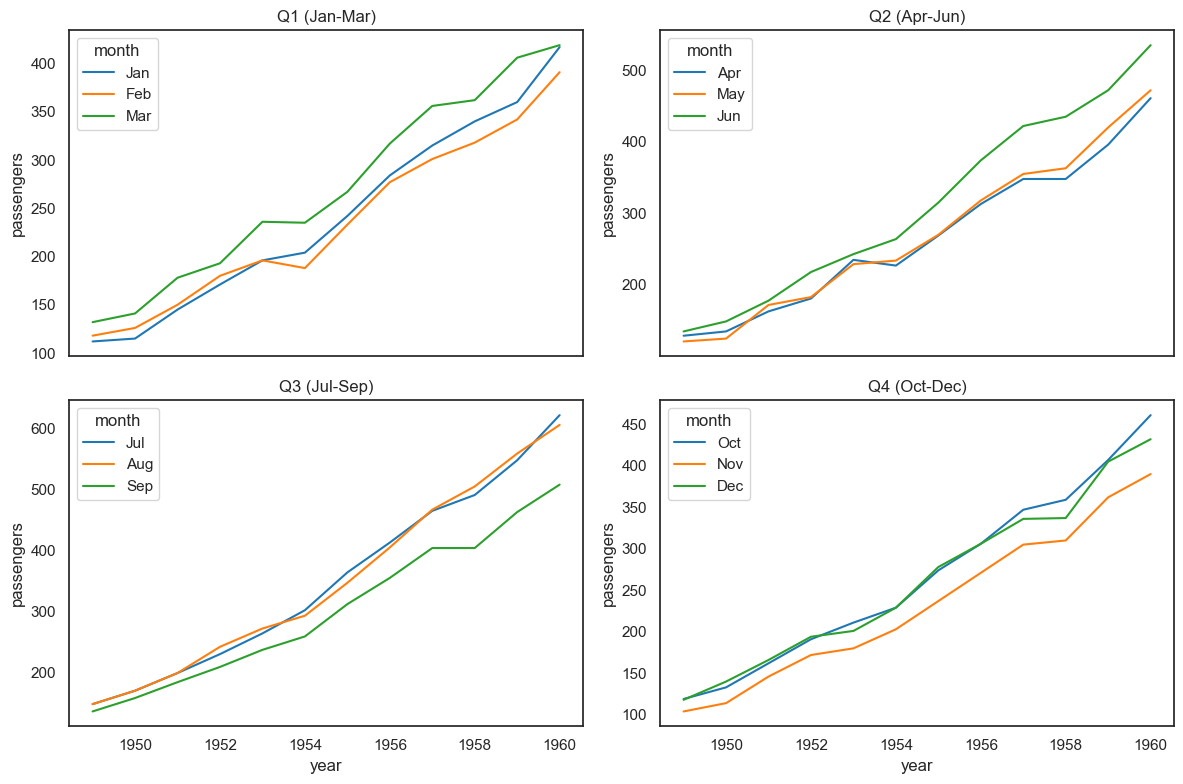

In [39]:
month_groups = [
    ['Jan', 'Feb', 'Mar'],  # Q1
    ['Apr', 'May', 'Jun'],  # Q2
    ['Jul', 'Aug', 'Sep'],  # Q3
    ['Oct', 'Nov', 'Dec']   # Q4
]
group_labels = ["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"]


_, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)
for ax, three_months, title in zip(axs.flatten(), month_groups, group_labels):
    subset = flights[flights['month'].isin(three_months)]
    
    # `hue_order` restricts the legend to current `three_months` in the subplot
    sns.lineplot(data=subset, x="year", y="passengers", hue="month", hue_order=three_months, palette="tab10", ax=ax)
    ax.set_title(title, fontsize=12)

plt.tight_layout() 

Passing the entire dataset in long-form mode will aggregate over repeated values along x axis (each year) to show the mean and 95% confidence interval:

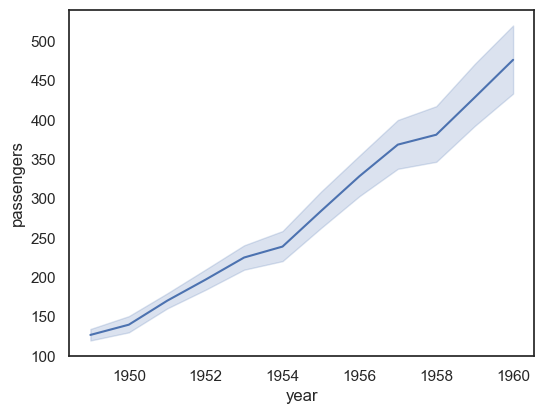

In [40]:
sns.lineplot(data=flights, x="year", y="passengers");

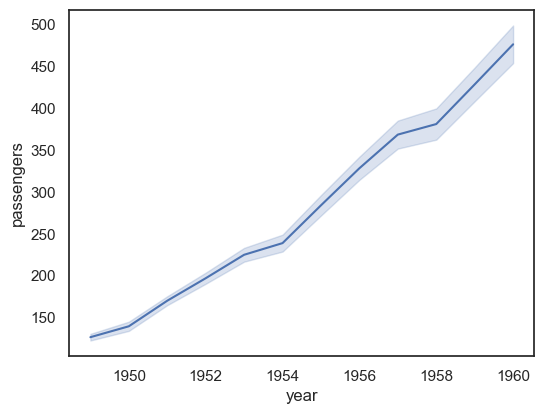

In [41]:
sns.lineplot(data=flights, x="year", y="passengers",errorbar="se");

### Available Options for `errorbar` in Seaborn

The `errorbar` parameter in `sns.relplot()` and `sns.lineplot()` controls how uncertainty is represented in line plots.

#### Standard Options

| Option | Meaning |
|--------|---------|
| `"se"` | Standard Error (default) |
| `"ci"` | Confidence Interval (default is 95%) |
| `"pi"` | Prediction Interval |


```python
sns.lineplot(data=fmri, x="timepoint", y="signal", errorbar="se")  # Standard Deviation Error (default: 1)
sns.lineplot(data=fmri, x="timepoint", y="signal", errorbar="ci")  # Confidence Interval (default: 95%)
sns.lineplot(data=fmri, x="timepoint", y="signal", errorbar="pi")  # Prediction Interval (default: 80%)
```



You can scale the error bars by a factor (default is **1**). This allows you to adjust the width of the error bars depending on the level of uncertainty you want to represent.

#### Available Scaling Options

| Option | Meaning |
|--------|---------|
| `("se", 2)` | 2 × Standard Error |
| `("ci", 90)` | 90% Confidence Interval |
| `("pi", 80)` | 80% Prediction Interval |


```python
sns.lineplot(data=fmri, x="timepoint", y="signal", errorbar=("se", 2))  # 2x Standard Error
sns.lineplot(data=fmri, x="timepoint", y="signal", errorbar=("se", 1.5))  # 1.5x Standard Error
```


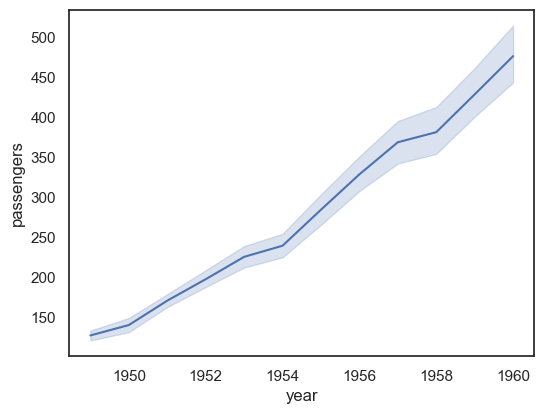

In [42]:
sns.lineplot(data=flights, x="year", y="passengers",errorbar=("ci", 90));

Use the `orient` parameter to aggregate and sort along the vertical dimension of the plot:

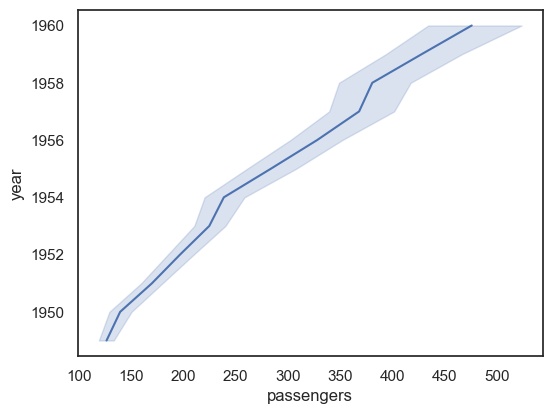

In [43]:
sns.lineplot(data=flights, x="passengers", y="year", orient="y");

Each semantic variable can also represent a different column. For that, we’ll need a more complex dataset:

In [44]:
fmri = sns.load_dataset("fmri")
fmri.sample(5)

,subject,timepoint,event,region,signal
666,s12,17,cue,frontal,0.003671
371,s8,7,stim,frontal,0.102759
187,s10,5,stim,parietal,0.253871
105,s7,11,stim,parietal,-0.030991
504,s2,17,stim,frontal,-0.049078


Repeated observations are aggregated:

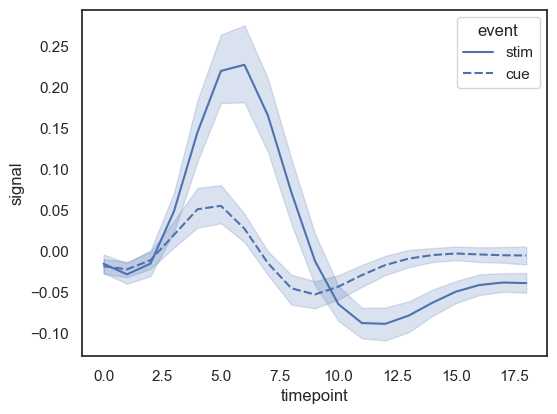

In [45]:
sns.lineplot(data=fmri, x="timepoint", y="signal", style="event"); # try: `hue`, `size`, `style`

When assigning a `style` variable, markers can be used instead of (or along with) dashes to distinguish the groups:

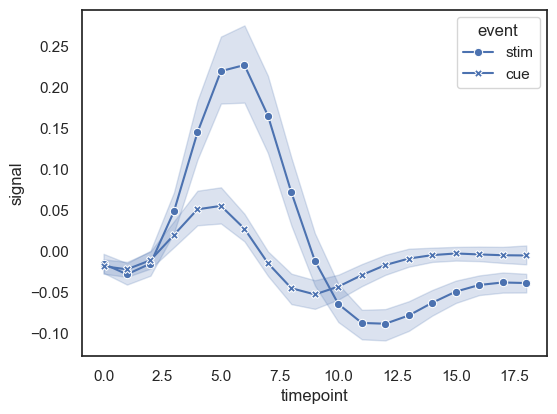

In [46]:
sns.lineplot(data=fmri, x="timepoint", y="signal", style="event", markers=True, dashes=False);

You can show error bars instead of error bands.

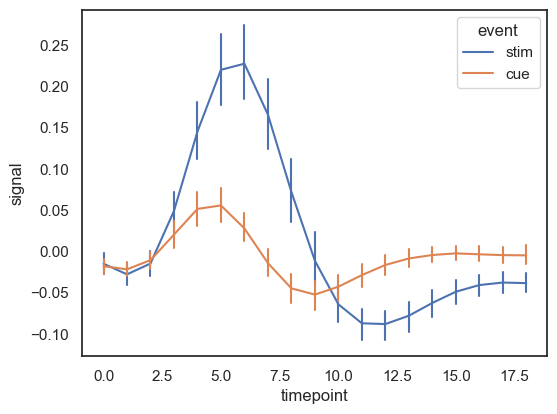

In [47]:
# sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", errorbar=("se", 2));
# sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", errorbar=("pi", 80));
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", err_style="bars", errorbar=("ci", 95));


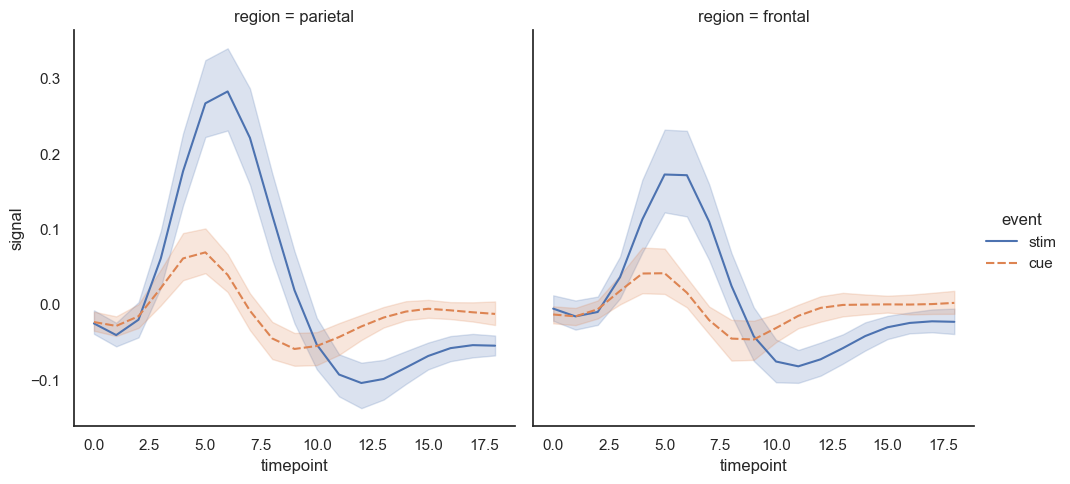

In [48]:
sns.relplot(
    data=fmri, x="timepoint", y="signal",
    col="region", hue="event", style="event",
    kind="line"
);